# Cruelty Free Companies #

<img src=https://upload.wikimedia.org/wikipedia/commons/6/6f/Cruelty-Free-TN.jpg width=200 align="left"> 

###### This file is licensed under the Creative Commons Attribution-Share Alike 4.0 International license. ######

<br><br>I will be getting the initial list from [Logical Harmony](https://logicalharmony.net/cruelty-free-brand-list/).

In [1]:
# import libraries
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
r = requests.get("https://logicalharmony.net/cruelty-free-brand-list/")
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []

# create another list that will contain each list item still with the tags
rows = []

# get all list tags in entry-content part of the page (found by inspecting site)
brand_section1 = soup.find(class_='entry-content')
for brand in brand_section1.find_all('li'):
    # make sure brands are being extracted correctly
    print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    # keep the tags info in this list
    rows.append(brand)
    
len(brands)
    

If a brand is completely vegan “100% Vegan” next to the brand name.
It is noted if a brand is cruelty-free but is owned by a parent company that is not cruelty-free.
If you see a brand in a font that isn’t black, that’s a link to content here on Logical Harmony where the brand is included or featured. That way you can see it in action, find out where it’s sold, find out what products they make, or read any reviews that have been published here.
100% Pure
100BON – 100% vegan
1121 Apothecary – 100% vegan
21 Drops – 100% vegan
2B
2nd KIND – 100% vegan!
7 Virtues, The – 100% vegan
8 Greens

A Girl’s Gotta Spa – 100% vegan
ABBA Pure Performance Hair Care – It should be noted that they are cruelty-free, but their parent company is not.
About Face – 100% vegan
Ace Beaute – Black-owned brand
Acid-2-Alkaline – 100% vegan
Activist Skincare – 100% vegan
Acure – 100% vegan!
Adorn Cosmetics – 100% vegan
Adwoa Beauty
Aether Beauty – 100% vegan
Aether Lashes – 100% vegan
Aeva Beauty – Black-owned bra

898

In [3]:
# create dataframe - start with just brands list, then adjust
df = pd.DataFrame({'Brand_info': brands})
df.head()

,Brand_info
0,If a brand is completely vegan “100% Vegan” ne...
1,It is noted if a brand is cruelty-free but is ...
2,"If you see a brand in a font that isn’t black,..."
3,100% Pure
4,100BON – 100% vegan


In [4]:
# The first three will always be her directions, so drop those rows
df = df.iloc[3:].reset_index(drop=True)
df.head()

,Brand_info
0,100% Pure
1,100BON – 100% vegan
2,1121 Apothecary – 100% vegan
3,21 Drops – 100% vegan
4,2B


In [5]:
# create a new column that tells whether or not a product is vegan
df['Is_vegan'] = df['Brand_info'].str.contains('100% vegan')

In [6]:
df.head()

,Brand_info,Is_vegan
0,100% Pure,False
1,100BON – 100% vegan,True
2,1121 Apothecary – 100% vegan,True
3,21 Drops – 100% vegan,True
4,2B,False


In [7]:
df['Brand_info'].str.contains('parent company').sum()

53

In [8]:
# create a column that tells if a brand is owned by a company that is NOT cruelty free
df['Bad_parent_company'] = df['Brand_info'].str.contains('parent company')

In [9]:
df.head()

,Brand_info,Is_vegan,Bad_parent_company
0,100% Pure,False,False
1,100BON – 100% vegan,True,False
2,1121 Apothecary – 100% vegan,True,False
3,21 Drops – 100% vegan,True,False
4,2B,False,False


In [10]:
df['Brand_info'].str.contains('Black-owned').sum()

51

In [11]:
# create a column that tells if the company is black-owned
df['Black_owned'] = df['Brand_info'].str.contains('Black-owned')
df.head()

,Brand_info,Is_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False
1,100BON – 100% vegan,True,False,False
2,1121 Apothecary – 100% vegan,True,False,False
3,21 Drops – 100% vegan,True,False,False
4,2B,False,False,False


In [12]:
# start to simplify the company name by removing attributes already noted in new columns
brand_df = df.copy() 
brand_df['Brand_info'].str.contains('–', '')

0      False
1       True
2       True
3       True
4      False
       ...  
890    False
891    False
892    False
893    False
894     True
Name: Brand_info, Length: 895, dtype: bool

In [14]:
brand_df.rename(columns={'Brand_info':'Brand'}, inplace=True)
brand_df.head()

,Brand,Is_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False
1,100BON – 100% vegan,True,False,False
2,1121 Apothecary – 100% vegan,True,False,False
3,21 Drops – 100% vegan,True,False,False
4,2B,False,False,False


### How many have parent companies that are not cruelty free ###

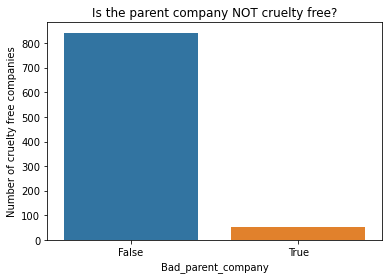

In [15]:
# import graphing packages
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.countplot(data=brand_df, x='Bad_parent_company')
fig.set_title('Is the parent company NOT cruelty free?')
fig.set_ylabel('Number of cruelty free companies');

In [16]:
import plotly.io as pio
pio.renderers.default = "svg"

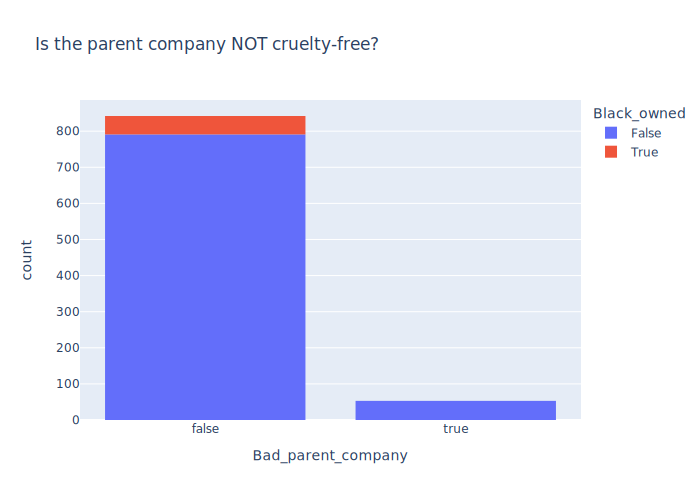

In [17]:
# now try with plotly
import plotly.express as px

fig = px.histogram(brand_df, x='Bad_parent_company', color="Black_owned", title='Is the parent company NOT cruelty-free?')
fig.show();

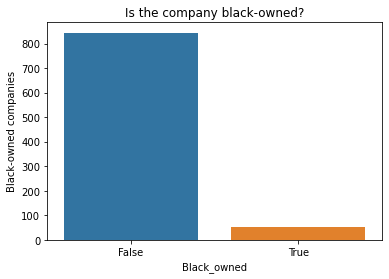

In [18]:
fig = sns.countplot(data=brand_df, x='Black_owned')
fig.set_title('Is the company black-owned?')
fig.set_ylabel('Black-owned companies');

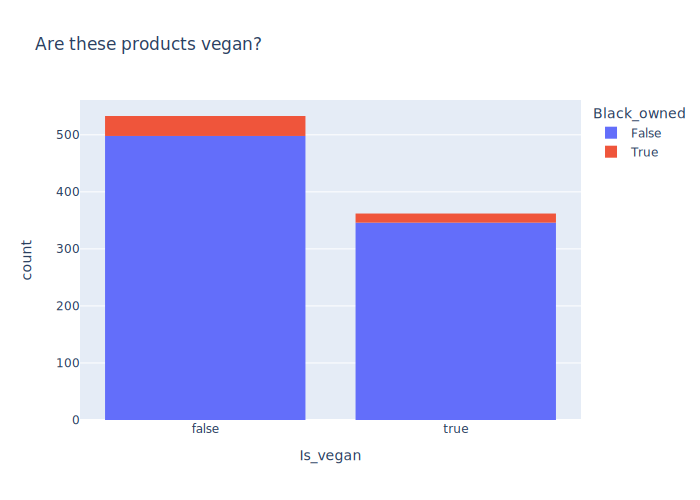

In [19]:
# check out vegan brand values, along with which are black-owned
fig = px.histogram(brand_df, x='Is_vegan', color="Black_owned", title='Are these products vegan?')
fig.show();

In [20]:
# are there any vegan brands owned by a company that is not cruelty free
brand_df[brand_df.Is_vegan & brand_df.Bad_parent_company]

,Brand,Is_vegan,Bad_parent_company,Black_owned
165,Certain Dri – 100% vegan! It should be noted t...,True,True,False
217,dermaGEEK – 100% vegan – It should be noted th...,True,True,False
249,Ecover – 100% vegan – It should be noted that ...,True,True,False
345,Hello Products – 100% vegan – It should be not...,True,True,False
427,KKW Fragrance – 100% vegan – It should be note...,True,True,False
444,Kylie Skin – 100% vegan – It should be noted t...,True,True,False
539,Method – 100% vegan! – It should be noted that...,True,True,False
625,"Ordinary, The – 100% vegan! – It should be not...",True,True,False
686,Pureology – 100% vegan It should be noted that...,True,True,False
728,Schmidt’s Naturals – 100% vegan! – It should ...,True,True,False


There sure are!  Let's graph this in two different ways.

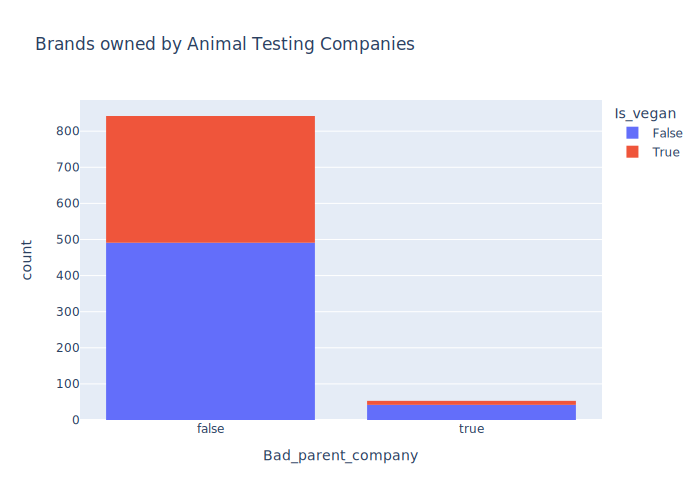

In [21]:
fig = px.histogram(brand_df, x='Bad_parent_company', color='Is_vegan', title='Brands owned by Animal Testing Companies')
fig.show();

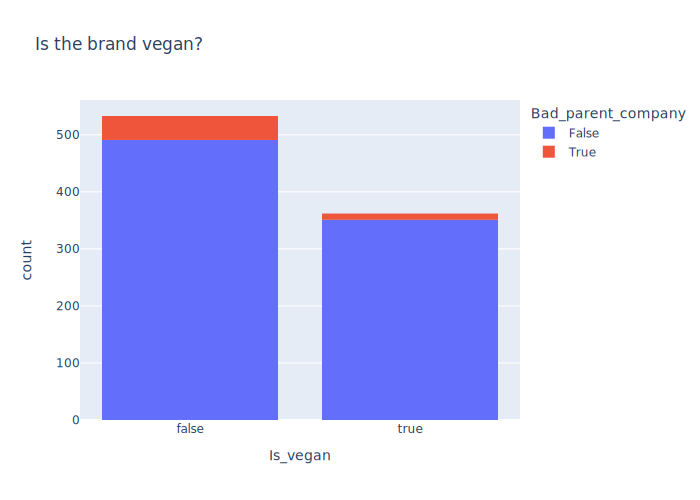

In [22]:
fig = px.histogram(brand_df, x='Is_vegan', color='Bad_parent_company', title='Is the brand vegan?')
fig.show();

In [23]:
veg_cf_black = brand_df[brand_df.Is_vegan & brand_df.Black_owned & ~brand_df.Bad_parent_company]

## Companies that are vegan, black-owned, *and* do not have a parent company that isn't cruelty free ##

In [24]:
for brand in veg_cf_black['Brand']:
    print(brand)
    
print('\nThere are {} companies that are vegan, black-owned, and do not have a parent company that participates in animal testing.'.format(len(veg_cf_black)))

Afrocenchix – 100% vegan, Black-owned brand
Dehiya – 100% vegan – Black-owned brand
Dimension Nails – 100% vegan – Black-owned brand
Dirt Don’t Hurt Me – 100% vegan – Black-owned brand
Jane Carter Solution – 100% vegan – Black-owned brand
LYS Beauty – 100% vegan – Black-owned brand
Mented Cosmetics – 100% vegan! – Black-owned brand
Mocha Whip – 100% vegan! – Black-owned brand
Nash + Pino – 100% vegan! – Black-owned brand
OOO Polish (Triple O Polish) – 100% vegan! – Black-owned brand
Pear Nova – 100% vegan – Black-owned brand
People of Color Beauty – 100% vegan – Black-owned brand
Sabreen Cosmetics – 100% vegan! – Black-owned brand
September Rose Co – 100% vegan! – Black-owned brand
Shimirose – 100% vegan! – Black-owned brand
SIMKHA – 100% vegan! – Black-owned brand

There are 16 companies that are vegan, black-owned, and do not have a parent company that participates in animal testing.


## Black-owned companies ##

In [25]:
brand_df[brand_df.Black_owned]['Brand']

12                        Ace Beaute – Black-owned brand
20                       Aeva Beauty – Black-owned brand
21           Afrocenchix – 100% vegan, Black-owned brand
41                       Anita Grant – Black-owned brand
98              BeautyStat Cosmetics – Black-owned brand
99                    Beauty Bakerie – Black-owned brand
103                  Beauty By Stony – Black-owned brand
134                  Bold Brand, The – Black-owned brand
139    Bossy Cosmetics (Bossy Lipstick) – Black-owned...
184         Coloured Raine Cosmetics – Black-owned brand
211              Dehiya – 100% vegan – Black-owned brand
224     Dimension Nails – 100% vegan – Black-owned brand
225    Dirt Don’t Hurt Me – 100% vegan – Black-owned ...
235                        DSMD Shop – Black-owned brand
267                         Eu’Genia – Black-owned brand
314                         Glamlite – Black-owned brand
357                Honey Pot Co, The – Black-owned brand
386    Jane Carter Solution – 1

## "Cruelty free" products whose parent companies are *NOT* cruelty free! ##

In [26]:
brand_df[brand_df.Bad_parent_company]['Brand']

10     ABBA Pure Performance Hair Care – It should be...
70     Aveda – It should be noted that they are cruel...
71     Awake Beauty – It should be noted that they ar...
85     bareMinerals – It should be noted that they ar...
106    Becca – It should be noted that they are cruel...
144    Briogeo – It should be noted that they are cru...
150    Burt’s Bees –  It should be noted that they ar...
152    Buxom – It should be noted that they are cruel...
159    Caldrea – It should be noted that they are cru...
165    Certain Dri – 100% vegan! It should be noted t...
169    Chemistry Brand, The – It should be noted that...
195    COVERGIRL – It should be noted that they are c...
216    Dermablend Professional – It should be noted t...
217    dermaGEEK – 100% vegan – It should be noted th...
218    Dermalogica – It should be noted that they are...
221    DevaCurl – It should be noted that they are cr...
233    Drunk Elephant – It should be noted that they ...
249    Ecover – 100% vegan – It

Next, I'll be looking for brands sold by different stores.